### Student Information
Name: 王昊文

Student ID: 107061112

GitHub ID: HowardWang0915

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__

2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

In [1]:
### Begin Assignment Here

### TODO
* Exercise 2
* Exercise 11
* Exercise 13
* Homework Wordfreq heatmap

# First Part
This part contains all the take home exercise from the master notebook

In [2]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import helpers.data_mining_helpers as dmh
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                 shuffle=True, random_state=42)
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns=['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))
X

text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
...                                                 ...       ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

               category_name  
0              comp.graphics  
1              comp.graphics  
2     soc.religion.christian  
3     soc.religion.christian  
4     soc.religion.christian  
...                      ...  
2252                 sci.med  
2253                 sci.med  
2254                 sci.med  
2255                 sci.med  
2256                 sci.med  

[2257 rows x 3 columns]

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [3]:
# Answer here
# In order to query items that a column satisfies some condition
X[X["category"] == 3][:10]

text  category  \
2   From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3   From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4   From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5   From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6   From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
10  From: anasaz!karl@anasazi.com (Karl Dussik) Su...         3   
18  From: tom_milligan@rainbow.mentorg.com Subject...         3   
20  From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...         3   
22  From: jkellett@netcom.com (Joe Kellett) Subjec...         3   
26  From: christian@geneva.rutgers.edu Subject: en...         3   

             category_name  
2   soc.religion.christian  
3   soc.religion.christian  
4   soc.religion.christian  
5   soc.religion.christian  
6   soc.religion.christian  
10  soc.religion.christian  
18  soc.religion.christian  
20  soc.religion.christian  
22  soc.religion.christian  
26  soc.religion.christian

In [4]:
# Selecting columns with multiple condition
X[(X["category"] == 1) | (X["category"] == 2)][:10]

text  category  category_name
0   From: sd345@city.ac.uk (Michael Collier) Subje...         1  comp.graphics
1   From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1  comp.graphics
7   From: aldridge@netcom.com (Jacquelin Aldridge)...         2        sci.med
8   From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2        sci.med
9   From: libman@hsc.usc.edu (Marlena Libman) Subj...         2        sci.med
11  From: amjad@eng.umd.edu (Amjad A Soomro) Subje...         1  comp.graphics
14  From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...         1  comp.graphics
15  From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...         1  comp.graphics
16  From: texx@ossi.com (Robert "Texx" Woodworth) ...         2        sci.med
23  From: d91-hes@tekn.hj.se (STEFAN HERMANSSON) S...         1  comp.graphics

In [5]:
# Query items that the text length is larger than 50000
X[[len(item) > 50000 for item in X["text"]]]

text  category  \
400   From: nfotis@ntua.gr (Nick C. Fotis) Subject: ...         1   
433   From: tgl+@cs.cmu.edu (Tom Lane) Subject: JPEG...         1   
1403  From: bobbe@vice.ICO.TEK.COM (Robert Beauchain...         0   
1890  From: nfotis@ntua.gr (Nick C. Fotis) Subject: ...         1   

      category_name  
400   comp.graphics  
433   comp.graphics  
1403    alt.atheism  
1890  comp.graphics

### >>> **Exercise 5 (takehome)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [6]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [7]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

To answer this answer accurately, we have the official definition of `isnull()` in the Pandas official documentation:
> This function takes a scalar or array-like object and indicates whether values are missing (*NaN* in numeric arrays, None or *NaN* in object arrays, *NaT* in datetimelike).

* For id `A`, `np.nan` means **not a number**, hence `isnull()` will return `True`.
* For id `B`, the value is actually missing, it is equivilant to `NONE` in python, hence `isnull()` will return `True`.
* For id `C`, `'NAN'` is a string, it does not mean **not a number**, `isnull()` will never return `True` if passed in a string(even it is an empty string, according to the definition). Hence, `isnull()` will return `False`. 
* For id `D`, the reason is same as id `c`, hence `isnull()` will return `False`.
* For id `E`, the value `NONE` is a data structure which means `NULL` in python, it is commonly used prevent segmentation fault, it is used as a safe way to indicate that a variable is actually missing. According to the definition, `isnull()` will return `True`.
* For id `F`, empty string will not return `True` according to the definition, hence `isnull()` will return `False`.

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [8]:
# Show value counts for each label
print("Size of original data is", len(X))
# Value counts for each label of the original data
X.category_name.value_counts()

Size of original data is 2257


soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64

In [9]:
# Value counts for each label of the sampled data
X_sample = X.sample(n=1000)
X_sample.category_name.value_counts()

soc.religion.christian    279
sci.med                   261
comp.graphics             241
alt.atheism               219
Name: category_name, dtype: int64

In [10]:
print("The number of duplicates in X_sample is", X_sample.duplicated().sum())
print("The size of down sampled X is", len(X_sample.category_name))
print("The downsample ratio is", len(X_sample) / len(X))

The number of duplicates in X_sample is 0
The size of down sampled X is 1000
The downsample ratio is 0.44306601683650865


In [11]:
# Check if the ratio is being preserved
for i in range(len(X_sample.category_name.value_counts())):
    print(X_sample.category_name.value_counts()[i] / X.category_name.value_counts()[i])

0.4657762938230384
0.4393939393939394
0.4126712328767123
0.45625


* No duplicates inside the down sampled data
* The downsample ratio for each category is close to the total down sampling ratio 0.44

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

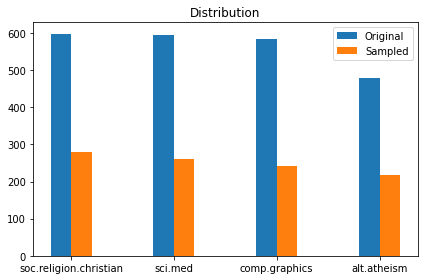

In [12]:
import matplotlib.pyplot as plt
# Answer here
labels = ['soc.religion.christian', 'sci.med', 'comp.graphics', 'alt.atheism']
x = np.arange(len(labels))
width = 0.20 # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, X.category_name.value_counts(), width, label='Original')
rects2 = ax.bar(x + width/2, X_sample.category_name.value_counts(), width, label='Sampled')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Distribution')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.style.use('default')
plt.show()

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [14]:
# Answer here
result = np.where(X_counts[4].toarray()[0] == 1)
print("The another 1 in the fifth record is at index", result[0][1])

The another 1 in the fifth record is at index 37


### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

/home/howard/miniconda3/envs/Data-Mining/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


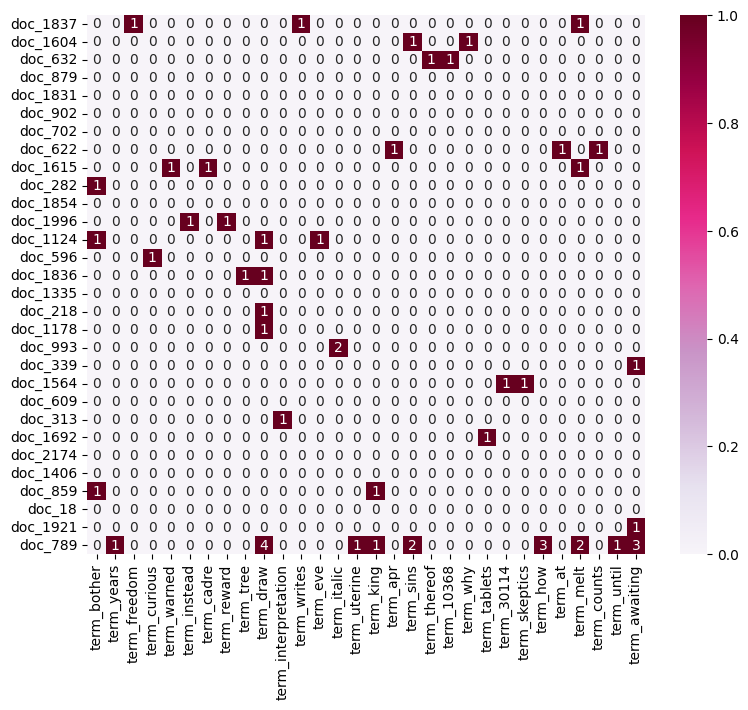

In [15]:
# Answer here
# TODO Finish this
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

X_sample_2 = X.sample(30)

count_sample_vect = CountVectorizer()
X_sample_2_counts = count_sample_vect.fit_transform(X_sample_2.text)

# import random  
from random import sample 
count_sample_name = sample(count_sample_vect.get_feature_names(), 30 )

plot_sample_x = ["term_"+str(i) for i in count_sample_name]
plot_sample_y = ["doc_"+ str(i) for i in list(X_sample_2.index)]
plot_sample_z = X_sample_2_counts[:30,:30].toarray()

df_todraw = pd.DataFrame(plot_sample_z, columns = plot_sample_x, index = plot_sample_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [16]:
# Answer here
# We will use the projection utility from matplotlib
# Also use the view_init function to rotate the plot
from sklearn.decomposition import PCA

X_reduced_3d = PCA(n_components=3).fit_transform(X_counts.toarray())
X_reduced_3d.shape

(2257, 3)

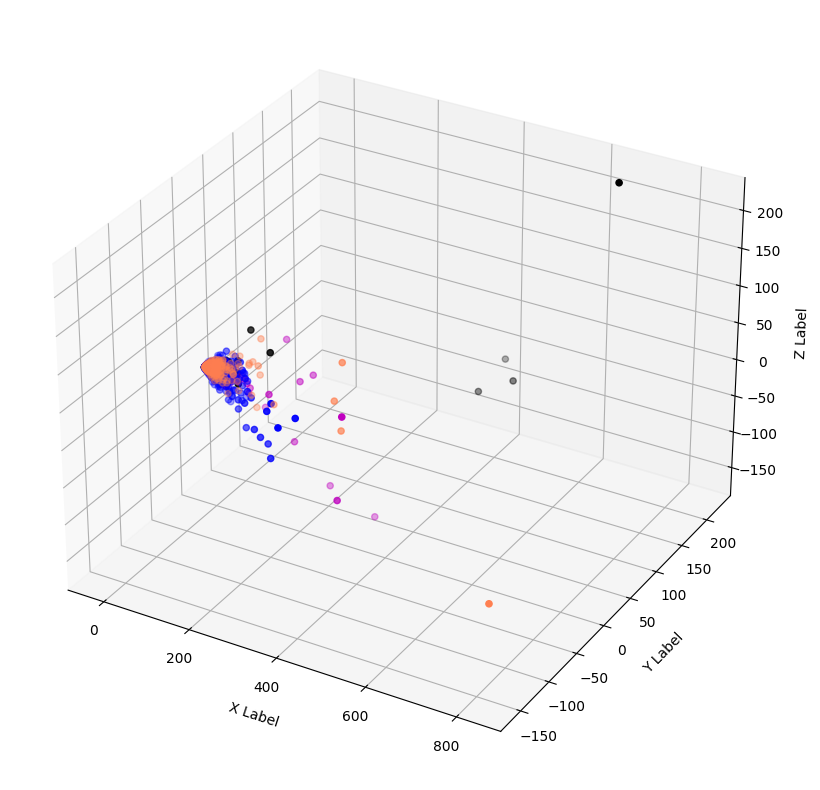

In [17]:
# Plot first angle
col = ['coral', 'blue', 'black', 'm']
fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced_3d[X['category_name'] == category].T[0]
    ys = X_reduced_3d[X['category_name'] == category].T[1]
    zs = X_reduced_3d[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c=c, marker='o')
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
plt.show()

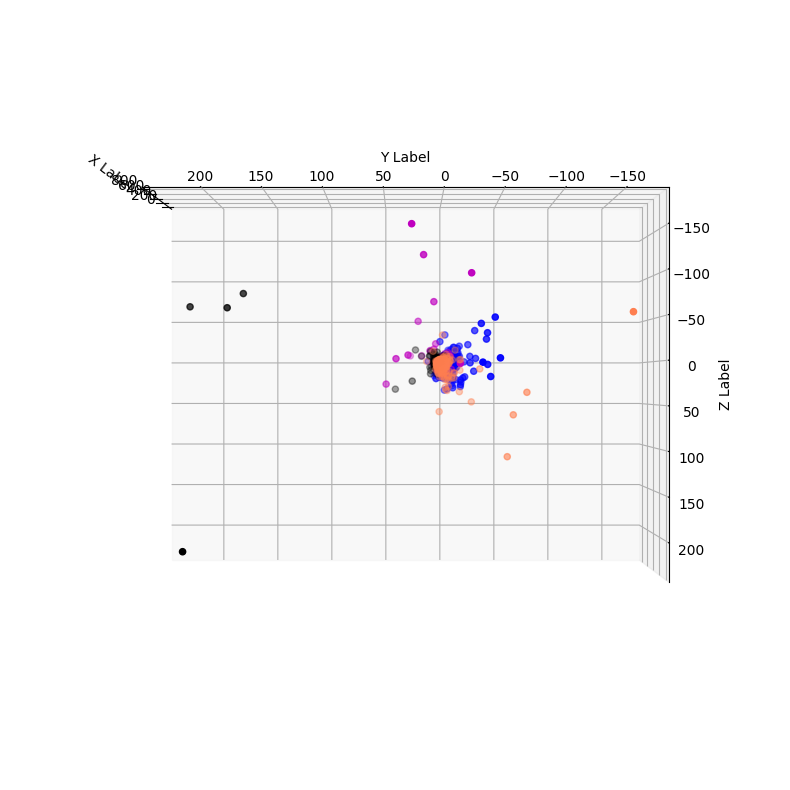

In [18]:
# Plot second angle
col = ['coral', 'blue', 'black', 'm']
fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced_3d[X['category_name'] == category].T[0]
    ys = X_reduced_3d[X['category_name'] == category].T[1]
    zs = X_reduced_3d[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c=c, marker='o')
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

ax.view_init(elev=180, azim=180)
plt.show()

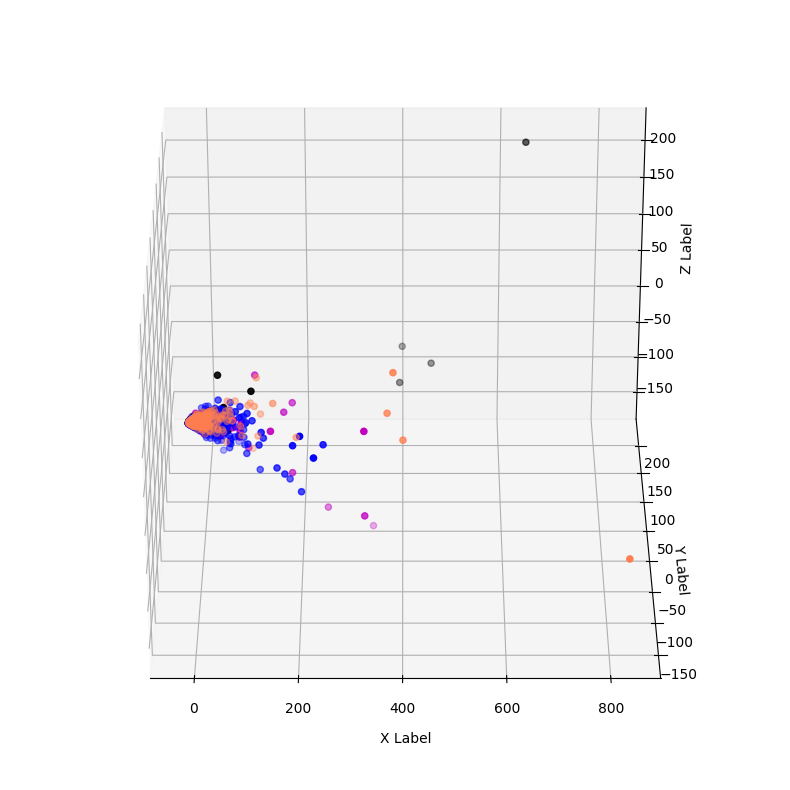

In [19]:
# Plot third angle
col = ['coral', 'blue', 'black', 'm']
fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced_3d[X['category_name'] == category].T[0]
    ys = X_reduced_3d[X['category_name'] == category].T[1]
    zs = X_reduced_3d[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c=c, marker='o')
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

ax.view_init(elev=30, azim=270)
plt.show()

**Observations**
* Even an additional dimension added, the data is still clustered, it does not help seperate the data.
* PCA is not well-suited for this task.

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [20]:
# Answer here
# TODO Check this!
import plotly.graph_objects as go
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
x = count_vect.get_feature_names()[:300]
y = term_frequencies[:300]
fig5 = go.Figure()
fig5.add_trace(go.Bar(x=x, y=y))
fig5.show()

/home/howard/miniconda3/envs/Data-Mining/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

In [21]:
# Answer here
# construct a dictionary for pandas
df = {"feature":count_vect.get_feature_names(), "freq": term_frequencies}
df = pd.DataFrame(df)
# Filter out terms that have frequency less than 4, in order to get higher freqs.
df_cond = df[df['freq'] > 4]
# Sample 300 of them
df_sample = df_cond.sample(300)

# Use plotly
x = df_sample['feature']
y = df_sample['freq']
fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=y))
fig.show()

/home/howard/miniconda3/envs/Data-Mining/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [22]:
# Answer here df = {"feature":count_vect.get_feature_names(), "freq": term_frequencies}
df = pd.DataFrame(df)
# use the nlargest function to get sorted results
df = df.nlargest(300, 'freq')

x = df['feature']
y = df['freq']
fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=y))
fig.show()

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [23]:
# Answer here
# Yes, using similar approach
from sklearn import preprocessing

mlb_cn = preprocessing.LabelBinarizer()
mlb_cn.fit(X.category_name)
X['bin_category_name'] = mlb_cn.transform(X['category_name']).tolist()
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name bin_category_name  
0           comp.graphics      [0, 1, 0, 0]  
1           comp.graphics      [0, 1, 0, 0]  
2  soc.religion.christian      [0, 0, 0, 1]  
3  soc.religion.christian      [0, 0, 0, 1]  
4  soc.religion.christian      [0, 0, 0, 1]  
5  soc.religion.christian      [0, 0, 0, 1]  
6  soc.religion.christian      [0, 0, 0, 1]  
7                 sci.med      [0, 0, 1, 0]  
8                 sci.med      [0, 0, 1, 0]

# Second Part

### Data preperation

In [24]:
# show the data in splitline format for clearer view
with open('data/sentiment labelled sentences/amazon_cells_labelled.txt', 'r', encoding="utf-8") as f:
    data_1_ = f.read()
data_1 = data_1_.split(sep='\n')[:-1] # drop last line
print(len(data_1))
data_1[:10]

1000


['So there is no way for me to plug it in here in the US unless I go by a converter.\t0',
 'Good case, Excellent value.\t1',
 'Great for the jawbone.\t1',
 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!\t0',
 'The mic is great.\t1',
 'I have to jiggle the plug to get it to line up right to get decent volume.\t0',
 'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.\t0',
 'If you are Razr owner...you must have this!\t1',
 'Needless to say, I wasted my money.\t0',
 'What a waste of money and time!.\t0']

In [25]:
# This data contains unicode data, utf-8 is required
with open('data/sentiment labelled sentences/imdb_labelled.txt', 'r', encoding='utf-8') as f:
    data_2_ = f.read()
data_2 = data_2_.split(sep='\n')[:-1] # drop last line
print(len(data_2))
data_2[:10]

1000


['A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  \t0',
 'Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  \t0',
 'Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  \t0',
 'Very little music or anything to speak of.  \t0',
 'The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.  \t1',
 "The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.  \t0",
 'Wasted two hours.  \t0',
 'Saw the movie today and thought it was a good effort, good messages for kids.  \t1',
 'A bit predictable.  \t0',
 'Loved the casting of Jimmy Buffet as the science teacher.  \t1']

In [26]:
with open('data/sentiment labelled sentences/yelp_labelled.txt', 'r', encoding='utf-8') as f:
    data_3_ = f.read()
data_3 = data_3_.split(sep='\n')[:-1] # drop last line
print(len(data_3))
data_3[:10]

1000


['Wow... Loved this place.\t1',
 'Crust is not good.\t0',
 'Not tasty and the texture was just nasty.\t0',
 'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.\t1',
 'The selection on the menu was great and so were the prices.\t1',
 'Now I am getting angry and I want my damn pho.\t0',
 "Honeslty it didn't taste THAT fresh.)\t0",
 'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.\t0',
 'The fries were great too.\t1',
 'A great touch.\t1']

In [27]:
# Append data
data = []
data.append([data_1, data_2, data_3])
data = data[0]
len(data)

3

## 3. Data Transformation

### 3.1 Converting Dictionary into Pandas Dataframe

In [28]:
# Construct temp data array for data frame
temp_data = []
# 0 for negative, 1 for positive
categories = ['negative', 'positive']
# split data and construct dataframe
for d in data:
    for s in d:
        t = s.split(sep="\t") # seperate with tabs
        text = t[0] # obtain the text
        cat = int(t[1]) # obtain numbered category
        category_name = categories[cat]
        temp_data.append([text, cat, category_name])
# construct dataframe with three cols
df = pd.DataFrame(temp_data, columns=['text', 'category', 'category_name'])
df

text  category  \
0     So there is no way for me to plug it in here i...         0   
1                           Good case, Excellent value.         1   
2                                Great for the jawbone.         1   
3     Tied to charger for conversations lasting more...         0   
4                                     The mic is great.         1   
...                                                 ...       ...   
2995  I think food should have flavor and texture an...         0   
2996                           Appetite instantly gone.         0   
2997  Overall I was not impressed and would not go b...         0   
2998  The whole experience was underwhelming, and I ...         0   
2999  Then, as if I hadn't wasted enough of my life ...         0   

     category_name  
0         negative  
1         positive  
2         positive  
3         negative  
4         positive  
...            ...  
2995      negative  
2996      negative  
2997      negative  
2998      negative  
2999      negative  

[3000 rows x 3 columns]

In [29]:
df['text']

0       So there is no way for me to plug it in here i...
1                             Good case, Excellent value.
2                                  Great for the jawbone.
3       Tied to charger for conversations lasting more...
4                                       The mic is great.
                              ...                        
2995    I think food should have flavor and texture an...
2996                             Appetite instantly gone.
2997    Overall I was not impressed and would not go b...
2998    The whole experience was underwhelming, and I ...
2999    Then, as if I hadn't wasted enough of my life ...
Name: text, Length: 3000, dtype: object

## 4. Data Mining using Pandas

### 4.1 Missing Values

In [30]:
# Check for missing values using dmf
import helpers.data_mining_helpers as dmh
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=0)

text                            category  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                        category_name  
0  The amoung of missing records is:   
1                                   0

### 4.2 Dealing with Duplicate Data

In [31]:
# Duplicated data
print("Length of data:", len(df))
print("Number of duplicates:", sum(df.duplicated('text')))

Length of data: 3000
Number of duplicates: 17


In [32]:
# Drop out duplicate data, keep only the first occurence
df.drop_duplicates(keep='first', inplace=True)
print("Length of data after dropping duplicates:", len(df))

Length of data after dropping duplicates: 2983


## 5. Data Preprecessing

### 5.1 Data distribution

In [33]:
categories

['negative', 'positive']

negative    1493
positive    1490
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

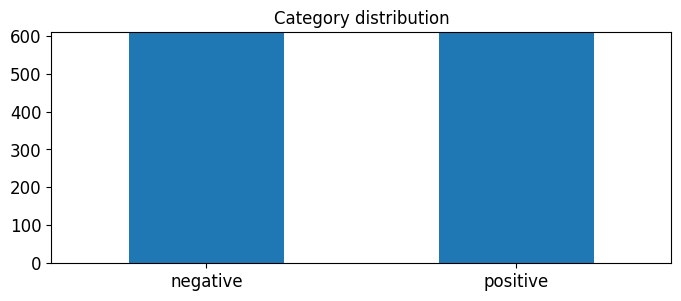

In [34]:
# Visualization on the distribution of labels
print(df.category_name.value_counts())
upper_bound = max(X.category_name.value_counts()) + 10
df.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, upper_bound],
                                    rot = 0,
                                    fontsize = 12,
                                    figsize = (8, 3))

### 5.2 Feature Creation

In [35]:
import nltk
# create unigrams column 
df['unigrams'] = df['text'].apply(lambda x: dmh.tokenize_text(x))
df[0:4]['unigrams']

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [36]:
# showcase the dataframe containing the unigrams
df[0:4]

text  category category_name  \
0  So there is no way for me to plug it in here i...         0      negative   
1                        Good case, Excellent value.         1      positive   
2                             Great for the jawbone.         1      positive   
3  Tied to charger for conversations lasting more...         0      negative   

                                            unigrams  
0  [So, there, is, no, way, for, me, to, plug, it...  
1               [Good, case, ,, Excellent, value, .]  
2                      [Great, for, the, jawbone, .]  
3  [Tied, to, charger, for, conversations, lastin...

### 5.3 Feature subset selection

In [37]:
# use the freq as a new feature, with number encoding
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.text)
df['freq'] = list(df_counts.toarray())
analyze = count_vect.build_analyzer()
df_counts.shape

(2983, 5155)

In [38]:
df[:10]

text  category category_name  \
0  So there is no way for me to plug it in here i...         0      negative   
1                        Good case, Excellent value.         1      positive   
2                             Great for the jawbone.         1      positive   
3  Tied to charger for conversations lasting more...         0      negative   
4                                  The mic is great.         1      positive   
5  I have to jiggle the plug to get it to line up...         0      negative   
6  If you have several dozen or several hundred c...         0      negative   
7        If you are Razr owner...you must have this!         1      positive   
8                Needless to say, I wasted my money.         0      negative   
9                   What a waste of money and time!.         0      negative   

                                            unigrams  \
0  [So, there, is, no, way, for, me, to, plug, it...   
1               [Good, case, ,, Excellent, value, .]   
2                      [Great, for, the, jawbone, .]   
3  [Tied, to, charger, for, conversations, lastin...   
4                           [The, mic, is, great, .]   
5  [I, have, to, jiggle, the, plug, to, get, it, ...   
6  [If, you, have, several, dozen, or, several, h...   
7  [If, you, are, Razr, owner, ..., you, must, ha...   
8    [Needless, to, say, ,, I, wasted, my, money, .]   
9       [What, a, waste, of, money, and, time, !, .]   

                                                freq  
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
5  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
6  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
7  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
8  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
9  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...

In [39]:
# showcase all the columns of the counting vector
count_vect.get_feature_names_out()

array(['00', '10', '100', ..., 'zillion', 'zombie', 'zombiez'],
      dtype=object)

In [40]:
df_counts[0:5, 0:50].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]])

/home/howard/miniconda3/envs/Data-Mining/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



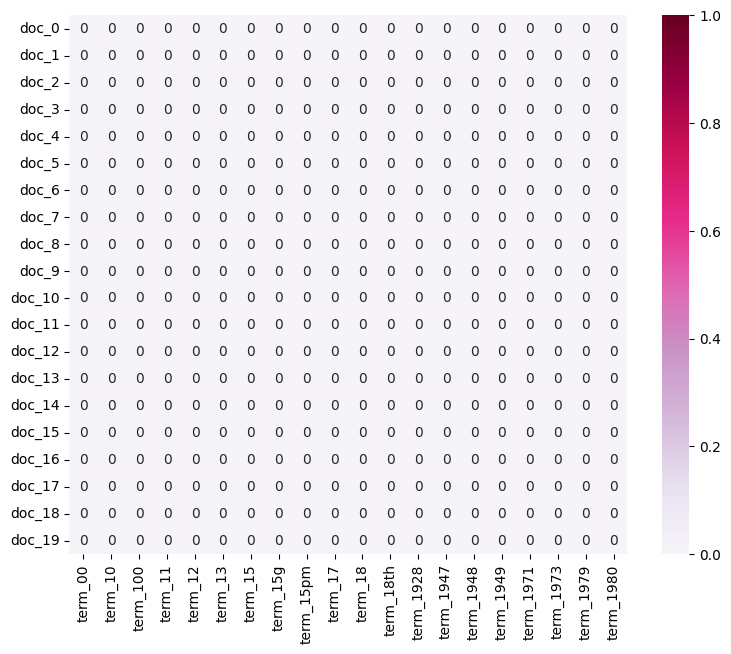

In [41]:
# FIXME: How to sample
# Visualization with seaborn
import seaborn as sns
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]
plot_z = df_counts[0:20, 0:20].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### 5.4 Dimensionality reduction

In [42]:
df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())
df_reduced.shape

(2983, 2)

In [43]:
categories

['negative', 'positive']

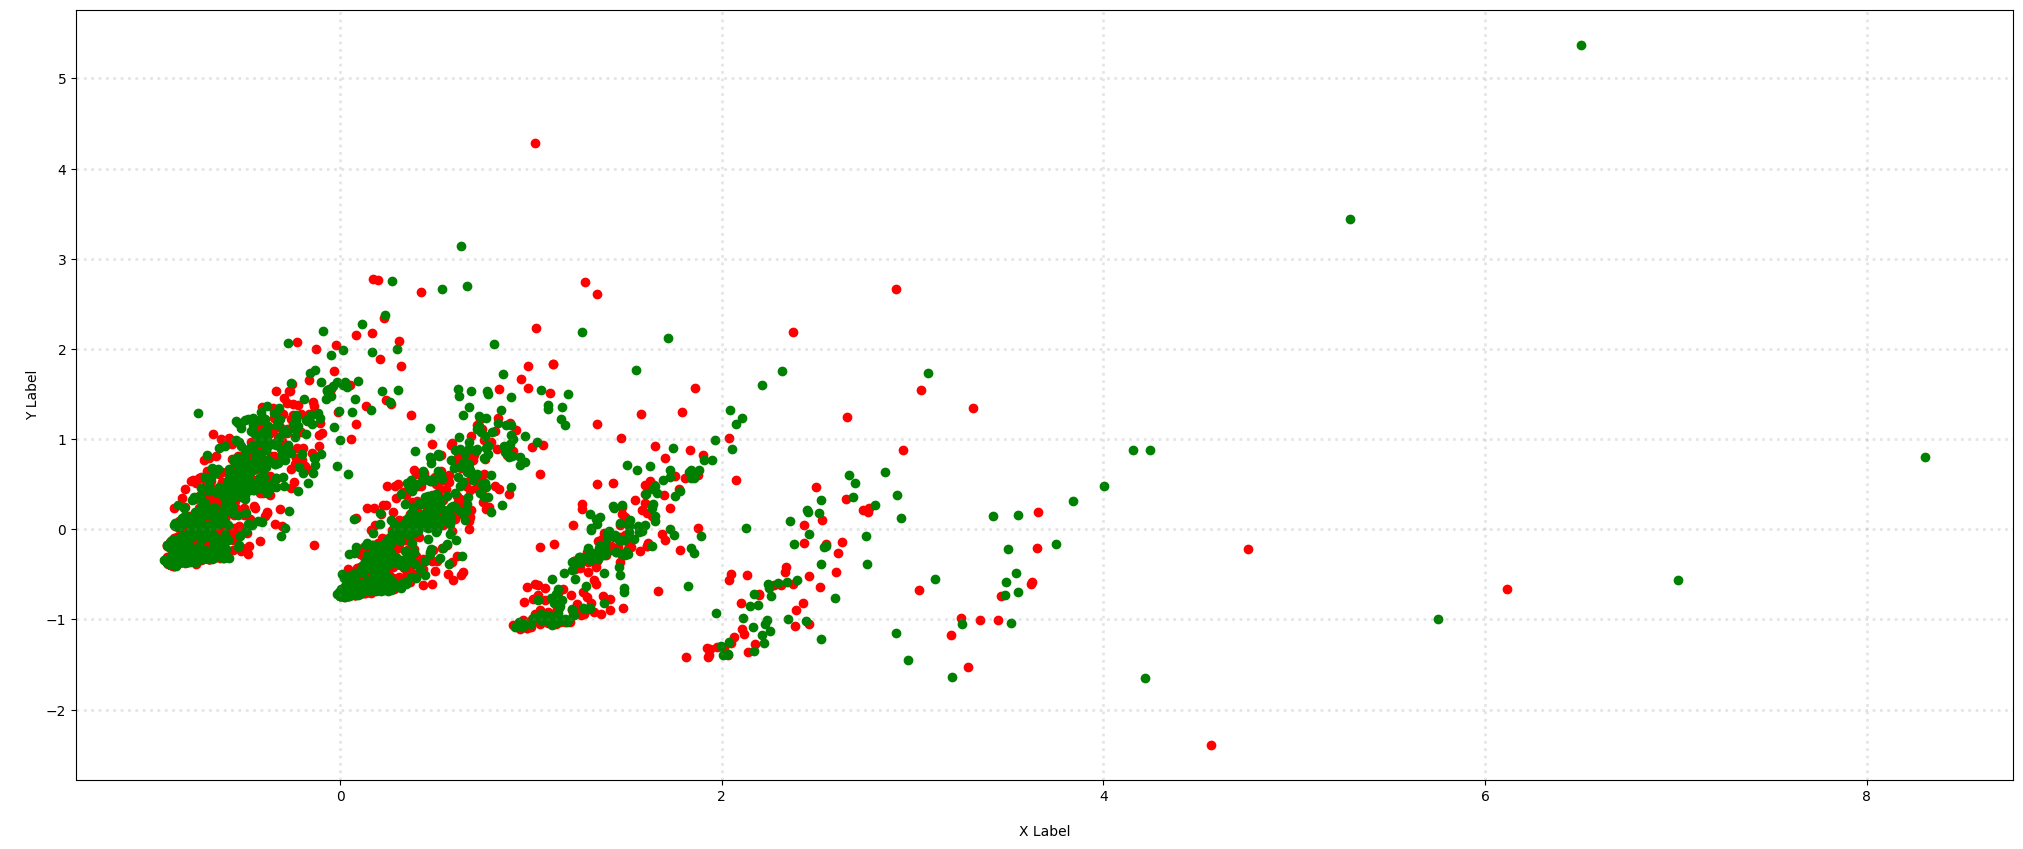

In [44]:
# Draw in 2D plot
col = ['red', 'green'] # only two labels

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = df_reduced[df['category_name'] == category].T[0]
    ys = df_reduced[df['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
plt.show()

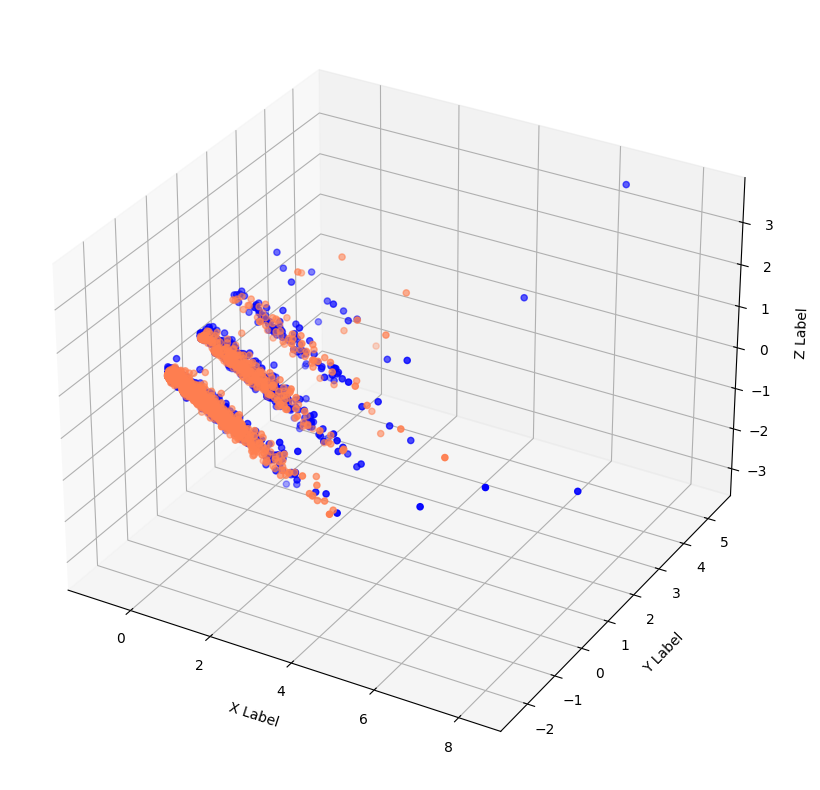

In [45]:
# PCA on 3D
df_reduced_3d = PCA(n_components=3).fit_transform(df_counts.toarray())
# Draw in 3D plot
col = ['coral', 'blue', 'black'] # 3 labels
fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(projection='3d')

for c, category in zip(col, categories):
    xs = df_reduced_3d[df['category_name'] == category].T[0]
    ys = df_reduced_3d[df['category_name'] == category].T[1]
    zs = df_reduced_3d[df['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c=c, marker='o')
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
plt.show()

### 5.5 Attribute Transformation / Aggregation

In [46]:
# Get total number of frequency among all the documents
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
term_frequencies

array([ 1, 36,  3, ...,  1,  2,  1])

/home/howard/miniconda3/envs/Data-Mining/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/home/howard/miniconda3/envs/Data-Mining/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



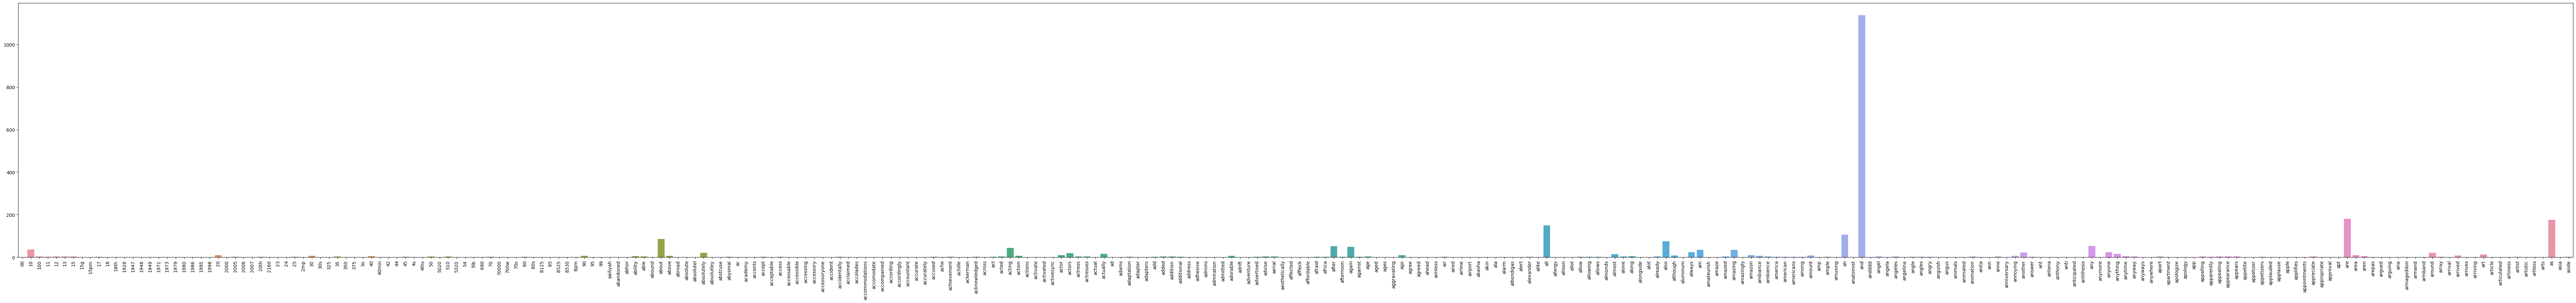

In [47]:
# Plot using seaborn
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [48]:
# Use sampling and plotly to get a better visualization
# construct a dictionary for pandas
df_plotly = {"feature":count_vect.get_feature_names(), "freq": term_frequencies}
df_plotly = pd.DataFrame(df_plotly)
# Filter out terms that have frequency less than 4, in order to get higher freqs.
df_cond = df_plotly[df_plotly['freq'] > 4]
# Sample 300 of them
df_sample = df_cond.sample(300)

# Use plotly
x = df_sample['feature']
y = df_sample['freq']
fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=y))
fig.show()

In [49]:
# Answer here
df_tail = {"feature":count_vect.get_feature_names(), "freq": term_frequencies}
df_tail = pd.DataFrame(df_tail)
df_tail = df_tail.nlargest(300, 'freq')

x = df_tail['feature']
y = df_tail['freq']
fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=y))
fig.show()

### 5.6 Discretization and Binarization

In [50]:
df[0:10]

text  category category_name  \
0  So there is no way for me to plug it in here i...         0      negative   
1                        Good case, Excellent value.         1      positive   
2                             Great for the jawbone.         1      positive   
3  Tied to charger for conversations lasting more...         0      negative   
4                                  The mic is great.         1      positive   
5  I have to jiggle the plug to get it to line up...         0      negative   
6  If you have several dozen or several hundred c...         0      negative   
7        If you are Razr owner...you must have this!         1      positive   
8                Needless to say, I wasted my money.         0      negative   
9                   What a waste of money and time!.         0      negative   

                                            unigrams  \
0  [So, there, is, no, way, for, me, to, plug, it...   
1               [Good, case, ,, Excellent, value, .]   
2                      [Great, for, the, jawbone, .]   
3  [Tied, to, charger, for, conversations, lastin...   
4                           [The, mic, is, great, .]   
5  [I, have, to, jiggle, the, plug, to, get, it, ...   
6  [If, you, have, several, dozen, or, several, h...   
7  [If, you, are, Razr, owner, ..., you, must, ha...   
8    [Needless, to, say, ,, I, wasted, my, money, .]   
9       [What, a, waste, of, money, and, time, !, .]   

                                                freq  
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
5  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
6  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
7  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
8  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
9  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...

In [51]:
from sklearn import preprocessing
mlb = preprocessing.LabelBinarizer()
mlb.fit(df.category)
print(mlb.classes_)
df['bin_category'] = mlb.transform(df['category']).tolist()
df[0:9][['text', 'category', 'bin_category']]

[0 1]


text  category bin_category
0  So there is no way for me to plug it in here i...         0          [0]
1                        Good case, Excellent value.         1          [1]
2                             Great for the jawbone.         1          [1]
3  Tied to charger for conversations lasting more...         0          [0]
4                                  The mic is great.         1          [1]
5  I have to jiggle the plug to get it to line up...         0          [0]
6  If you have several dozen or several hundred c...         0          [0]
7        If you are Razr owner...you must have this!         1          [1]
8                Needless to say, I wasted my money.         0          [0]

## 6. Data Exploration

In [52]:
document_to_transform_1 = []
random_record_1 = df.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["Not loud enough and doesn't turn on like it should."]
['Integrated seamlessly with the Motorola RAZR phone.']
['I Was Hoping for More.']


In [53]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [54]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


## Third part

### New visualization for new dataset
  
  
In the previous two sections, we can see that the visualizations are pretty hard to tell what is going on.
  
For text data, the best way to visualize the frequency is **word cloud**. The font will be larger if a word has higher frequency, on the other hand the font will be smaller if the word has lower frequency.

In [55]:
df[:5]

text  category category_name  \
0  So there is no way for me to plug it in here i...         0      negative   
1                        Good case, Excellent value.         1      positive   
2                             Great for the jawbone.         1      positive   
3  Tied to charger for conversations lasting more...         0      negative   
4                                  The mic is great.         1      positive   

                                            unigrams  \
0  [So, there, is, no, way, for, me, to, plug, it...   
1               [Good, case, ,, Excellent, value, .]   
2                      [Great, for, the, jawbone, .]   
3  [Tied, to, charger, for, conversations, lastin...   
4                           [The, mic, is, great, .]   

                                                freq bin_category  
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...          [0]  
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...          [1]  
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...          [1]  
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...          [0]  
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...          [1]

/home/howard/miniconda3/envs/Data-Mining/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



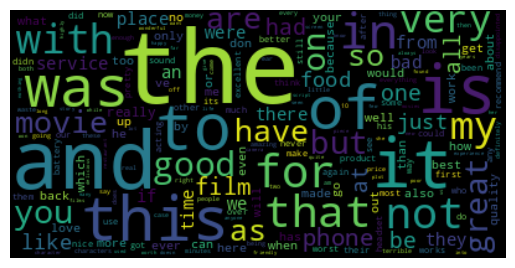

In [56]:
# Use the word cloud library for visualization
# An overview of all the words
from wordcloud import WordCloud
word_dict = {}
for i in range(len(count_vect.get_feature_names())):
    word_dict[count_vect.get_feature_names()[i]] = term_frequencies[i]
cloud = WordCloud().generate_from_frequencies(word_dict)
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

We can see that the information is not that useful, it contains lots of stop words and conjunction word such as **the**, **this**, **and**, which are not useful for classifying the document.
  
We can utilize a library from **nltk** to solve this.

[nltk_data] Downloading package stopwords to /home/howard/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


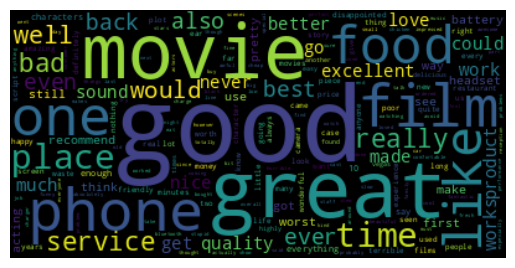

In [57]:
# TODO Finish this!
# 1. extract the stop word and show again
# 2. seperate class0 and class1 and generate the count_vect for each class
# 3. show the word clouds for class0 and class1 without the stop words
# 4. pandas.DataFrame.from_dict
from nltk.corpus import stopwords
nltk.download('stopwords')
word_dict = {}
for i in range(len(count_vect.get_feature_names())):
    if count_vect.get_feature_names()[i] not in stopwords.words('english'):
        word_dict[count_vect.get_feature_names()[i]] = term_frequencies[i]
cloud = WordCloud().generate_from_frequencies(word_dict)
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

From above, we can see that terms like 'great', 'good', 'phone', 'movie' appeared a lot in the dataset, if we exclude the stop words in English, we can sort of guess that the dataset is about someone's opion toward a movie, or a phone, or food. However, we are not that interested in words such as `movie`, `film`, `phone`, `food`, as it mostly does not affect the classification results.
  
Now, let's try to observe what words appears the most in a positive review, and what words appears the most in a negative review, without stopwords, also exclude the words mentioned above.

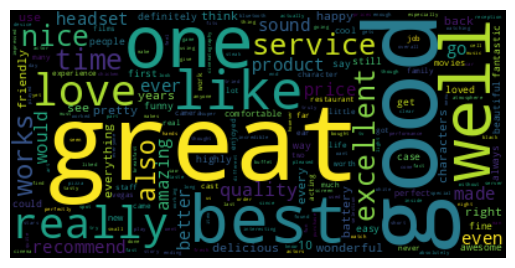

In [58]:
exclude_words = {'movie', 'phone', 'film', 'food', 'place'}
count_vect_pos = CountVectorizer()
df_pos = df[df['category_name'] == 'positive'].text
df_counts_pos = count_vect_pos.fit_transform(df_pos)
term_frequencies_pos = np.asarray(df_counts_pos.sum(axis=0))[0]
word_dict = {}
for i in range(len(count_vect_pos.get_feature_names())):
    if count_vect_pos.get_feature_names()[i] not in stopwords.words('english') \
    and count_vect_pos.get_feature_names()[i] not in exclude_words:
        word_dict[count_vect_pos.get_feature_names()[i]] = term_frequencies_pos[i]
cloud = WordCloud().generate_from_frequencies(word_dict)
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

We observe that, words like `great`, `good`, `best`, `well`, `excellent` appears frequently in poitive sentiments, which matches our expectation.

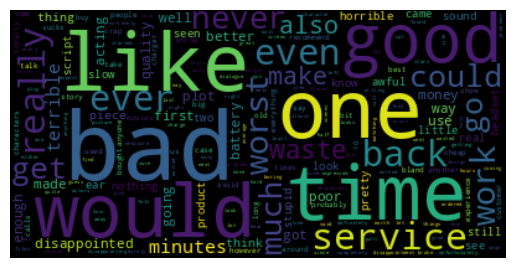

In [59]:
count_vect_neg = CountVectorizer()
df_neg = df[df['category_name'] == 'negative'].text
df_counts_neg = count_vect_neg.fit_transform(df_neg)
term_frequencies_neg = np.asarray(df_counts_neg.sum(axis=0))[0]
word_dict = {}
for i in range(len(count_vect_neg.get_feature_names())):
    if count_vect_neg.get_feature_names()[i] not in stopwords.words('english') \
    and count_vect_neg.get_feature_names()[i] not in exclude_words:
        word_dict[count_vect_neg.get_feature_names()[i]] = term_frequencies_neg[i]
cloud = WordCloud().generate_from_frequencies(word_dict)
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

One interesting observation is that the word 'good' actually appears a lot for negative texts. Let's try to list out the sentences that are negative, but includes the word 'good'

In [60]:
i = 0
for text in df_neg:
    if 'good' in text and i in range(20):
        print(text)
        i += 1

Not a good bargain.
Not a good item.. It worked for a while then started having problems in my auto reverse tape player.
Not good when wearing a hat or sunglasses.
If you are looking for a good quality Motorola Headset keep looking, this isn't it.
However, BT headsets are currently not good for real time games like first-person shooters since the audio delay messes me up.
Disappointing accessory from a good manufacturer.
Looks good in the picture, but this case was a huge disappointment!!
Couldn't use the unit with sunglasses, not good in Texas!
I really wanted the Plantronics 510 to be the right one, but it has too many issues for me.The good
At first I thought I was grtting a good deal at $7.44, until I plugged it into my phone (V3c Razr).
Not as good as I had hoped.
Not good enough for the price.
Not nearly as good looking as the AMAZON picture makes it look.
The performances are not improved by improvisation, because the actors now have twice as much to worry about: not only whethe

A cool observation, good is used in a 'negative' way, for example: `not good at all`, `not in a good way`, `aren't that good`. The same explaination is applicable for words for `like`, `would`.

### TF-IDF Feature

In [61]:
# TF-IDF feature, using sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1)
df_ti_counts = vectorizer.fit_transform(df.text)
vectorizer.get_feature_names()

# add tfidf to data frame
tfidf = vectorizer.fit_transform(df['text']).toarray()
df['tfidf']=list(tfidf)
print(tfidf.shape)

(2983, 5155)


In [62]:
df[:10][['text', 'tfidf']]

text  \
0  So there is no way for me to plug it in here i...   
1                        Good case, Excellent value.   
2                             Great for the jawbone.   
3  Tied to charger for conversations lasting more...   
4                                  The mic is great.   
5  I have to jiggle the plug to get it to line up...   
6  If you have several dozen or several hundred c...   
7        If you are Razr owner...you must have this!   
8                Needless to say, I wasted my money.   
9                   What a waste of money and time!.   

                                               tfidf  
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
5  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
6  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
7  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
8  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
9  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...

### Naive Bayes classifier
This part includes
1. Word Frequency feature
2. TF-IDF feature
  
Note that the results will be shown using train:test of 7:3.

#### Predicting with Word frequency

In [63]:
df[:10]

text  category category_name  \
0  So there is no way for me to plug it in here i...         0      negative   
1                        Good case, Excellent value.         1      positive   
2                             Great for the jawbone.         1      positive   
3  Tied to charger for conversations lasting more...         0      negative   
4                                  The mic is great.         1      positive   
5  I have to jiggle the plug to get it to line up...         0      negative   
6  If you have several dozen or several hundred c...         0      negative   
7        If you are Razr owner...you must have this!         1      positive   
8                Needless to say, I wasted my money.         0      negative   
9                   What a waste of money and time!.         0      negative   

                                            unigrams  \
0  [So, there, is, no, way, for, me, to, plug, it...   
1               [Good, case, ,, Excellent, value, .]   
2                      [Great, for, the, jawbone, .]   
3  [Tied, to, charger, for, conversations, lastin...   
4                           [The, mic, is, great, .]   
5  [I, have, to, jiggle, the, plug, to, get, it, ...   
6  [If, you, have, several, dozen, or, several, h...   
7  [If, you, are, Razr, owner, ..., you, must, ha...   
8    [Needless, to, say, ,, I, wasted, my, money, .]   
9       [What, a, waste, of, money, and, time, !, .]   

                                                freq bin_category  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...          [0]   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...          [1]   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...          [1]   
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...          [0]   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...          [1]   
5  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...          [0]   
6  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...          [0]   
7  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...          [1]   
8  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...          [0]   
9  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...          [0]   

                                               tfidf  
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
5  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
6  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
7  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
8  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
9  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...

In [64]:
# naive bayes with word freq
# We use the multinomial naive bayes from sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

model = MultinomialNB()
X = df['freq']
y = df['category']
X = list(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=None)
X_train[:10], y_train[:10]

([array([0, 0, 0, ..., 0, 0, 0]),
  array([0, 0, 0, ..., 0, 0, 0]),
  array([0, 0, 0, ..., 0, 0, 0]),
  array([0, 0, 0, ..., 0, 0, 0]),
  array([0, 0, 0, ..., 0, 0, 0]),
  array([0, 0, 0, ..., 0, 0, 0]),
  array([0, 0, 0, ..., 0, 0, 0]),
  array([0, 0, 0, ..., 0, 0, 0]),
  array([0, 0, 0, ..., 0, 0, 0]),
  array([0, 0, 0, ..., 0, 0, 0])],
 70      0
 114     1
 2554    0
 224     0
 1606    0
 1792    1
 175     1
 2071    1
 455     0
 2120    0
 Name: category, dtype: int64)

In [65]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1045
           1       0.78      0.78      0.78      1044

    accuracy                           0.78      2089
   macro avg       0.78      0.78      0.78      2089
weighted avg       0.78      0.78      0.78      2089

[[816 229]
 [233 811]]


In [66]:
# Show misclassified texts
x = 0
for i in range(len(df)):
    ans = int(model.predict([df.loc[i].freq]))
    if ans != df.loc[i].category:
        x += 1
        print(df.loc[i].text)
        print("Classified results: " + str(categories[ans]))
        print("Actual label: " + categories[df.loc[i].category])
    if x > 10:
        break

He was very impressed when going from the original battery to the extended battery.
Classified results: negative
Actual label: positive
If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.
Classified results: positive
Actual label: negative
The design is very odd, as the ear "clip" is not very comfortable at all.
Classified results: positive
Actual label: negative
I have yet to run this new battery below two bars and that's three days without charging.
Classified results: negative
Actual label: positive
It is unusable in a moving car at freeway speed.
Classified results: positive
Actual label: negative
I have two more years left in this contract and I hate this phone.
Classified results: positive
Actual label: negative
Who in their right mind is gonna buy this battery?.
Classified results: positive
Actual label: negative
This case seems well made.
Classified results: negative
Actual label: positive
good protection and does n

#### Predicting with TF-IDF feature

In [67]:
# naive bayes with word freq
# We use the multinomial naive bayes from sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

model = MultinomialNB()
X = df['tfidf']
y = df['category']
X = list(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=None)
X_train[:10], y_train[:10]

([array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.]),
  array([0., 0., 0., ..., 0., 0., 0.])],
 2733    1
 2176    0
 981     0
 2300    1
 2664    1
 2529    1
 1332    0
 354     0
 611     1
 920     1
 Name: category, dtype: int64)

In [68]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79      1044
           1       0.80      0.75      0.77      1045

    accuracy                           0.78      2089
   macro avg       0.78      0.78      0.78      2089
weighted avg       0.78      0.78      0.78      2089

[[849 195]
 [265 780]]


In [69]:
df[:10][['text', 'tfidf']]

text  \
0  So there is no way for me to plug it in here i...   
1                        Good case, Excellent value.   
2                             Great for the jawbone.   
3  Tied to charger for conversations lasting more...   
4                                  The mic is great.   
5  I have to jiggle the plug to get it to line up...   
6  If you have several dozen or several hundred c...   
7        If you are Razr owner...you must have this!   
8                Needless to say, I wasted my money.   
9                   What a waste of money and time!.   

                                               tfidf  
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
5  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
6  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
7  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
8  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
9  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...

In [70]:
# Showing classification results from our dataset
x = 0
# print testing text
print(df.loc[x].text)
# print predicted label
ans = int(model.predict([df.loc[x].tfidf]))
print("Results:")
categories[ans]

So there is no way for me to plug it in here in the US unless I go by a converter.
Results:


'negative'

In [71]:
# Show misclassified texts
x = 0
for i in range(len(df)):
    ans = int(model.predict([df.loc[i].tfidf]))
    if ans != df.loc[i].category:
        x += 1
        print(df.loc[i].text)
        print("Classified results: " + str(categories[ans]))
        print("Actual label: " + categories[df.loc[i].category])
    if x > 10:
        break

I bought it for my mother and she had a problem with the battery.
Classified results: positive
Actual label: negative
I didn't think that the instructions provided were helpful to me.
Classified results: positive
Actual label: negative
This is a simple little phone to use, but the breakage is unacceptible.
Classified results: positive
Actual label: negative
Car charger as well as AC charger are included to make sure you never run out of juice.Highy recommended
Classified results: negative
Actual label: positive
It has all the features I want
Classified results: negative
Actual label: positive
It feels more comfortable than most headsets because I wear glasses and that gets in the way sometimes.
Classified results: negative
Actual label: positive
Not a good bargain.
Classified results: positive
Actual label: negative
The battery runs down quickly.
Classified results: positive
Actual label: negative
This item worked great, but it broke after 6 months of use.
Classified results: positive


**Some overservations**
* We use Multinomial naive Bayes classifier, since works best with text data.
We see that using frequency and TF-IDF feature have similar performance, which yields approximately 79% of accuracy.  
* Precision, F1 score, and recall are near 79%, which means the model is not biased.
* Although the statistical performace are similar, the text that they misclassified are actually very different.

## Forth part
This part contains some reflections on inefficient part and ways that we can improve the preprocessing process

The most inefficient part in the whole preprocessing process is the high dimensionality of our data. In this case we are performing supervised classification tasks, however performing `PCA` or `LDA` on text data are usually not applicable. There are some better ways of reducing the dimensionality of our data.
1. Lowercasing all texts, to make our data more managble, since uppercase and lowercase of a word usually does not affect classification results.
2. Remove punctuations, special characters, stop words, frequent words. In the master notebook, this part is not included, however I have attempted this in the `new visualization` part to get a better view of the data.
3. Stemming, for example `walk`, `walking` and `walks` have the same meaning but only in different tense, these should be *stemmed* as `walk`. However, this part is error-prone and should be treated carefully. For example, `running nose` and `I am running` should be treated differently.
4. Checking for spelling errors, as mispelled words does not give insight to classification results.
5. Deal with URLS, in the first example, the text data contains email addresses, which does provide any insights for its task.
6. Carefully process emojis, emoticons, and chat words. These words can provide useful insights when performing sentiment analysis. However, based on your classification task, these can be removable to reduce the dimension of your text data.
  
I beleive that if the above steps are applied to the text data, we might get a better results at the naive Bayes classifier. However, Naive Bayes has its limitations, as it treats each word in a sentence independently. For example, we have shown that the word `good` appears frequently in negative sentences, however it is frequently connected with the word `not`, but naive Bayes does not put the order in consideration.

In [72]:
# TODO: Finish this